##  🌪️🌩️ Weather Impact on Urban Traffic Accidents ⛈️❄️

### Background and Motivation

*Traffic accidents are a global concern, causing countless injuries and fatalities every year. In major cities, where traffic density is high and weather conditions can vary dramatically, understanding what influences accident rates is crucial. Weather plays a significant role in shaping road conditions, visibility, and driver behavior, yet its specific impact on accidents in urban settings isn’t always clear. While severe weather like rain or snow is often blamed for accidents, even clear weather can create risks if drivers become overconfident or inattentive*

*This project is motivated by the need to uncover patterns between weather conditions and traffic accident rates in major cities. By analyzing how different weather scenarios affect accident frequency and severity, we can identify areas where safety improvements are needed. The ultimate goal is to inform policies and strategies that reduce accidents and make roads safer, regardless of whether the skies are sunny or stormy*








## Methodology

Importing relevant libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# Load the dataset
data = pd.read_csv('Road Accident Data.csv')
data

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


##### dropping unecessary coloumns for better focus

In [21]:
columns_to_keep = ['Accident Date', 'Day_of_Week', 'Accident_Severity', 'Weather_Conditions',
'Road_Type', 'Speed_limit', 'Urban_or_Rural_Area']
data_reduced = data[columns_to_keep]
data_cleaned = data_reduced.dropna()
data_cleaned

,Accident Date,Day_of_Week,Accident_Severity,Weather_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area
0,1/1/2021,Thursday,Serious,Fine no high winds,One way street,30,Urban
1,1/5/2021,Monday,Serious,Fine no high winds,Single carriageway,30,Urban
2,1/4/2021,Sunday,Slight,Fine no high winds,Single carriageway,30,Urban
3,1/5/2021,Monday,Serious,Other,Single carriageway,30,Urban
4,1/6/2021,Tuesday,Serious,Fine no high winds,Single carriageway,30,Urban
...,...,...,...,...,...,...,...
307968,2/18/2022,Thursday,Slight,Fine no high winds,Single carriageway,60,Rural
307969,2/21/2022,Sunday,Slight,Fine no high winds,Single carriageway,60,Rural
307970,2/23/2022,Tuesday,Slight,Fine no high winds,Single carriageway,30,Rural
307971,2/23/2022,Tuesday,Serious,Fine no high winds,Single carriageway,60,Rural


#### Distribution of Accident Severity

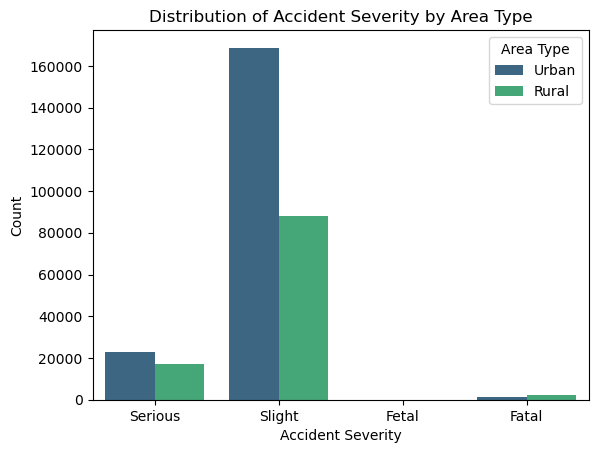

In [30]:
sns.countplot(data=data_cleaned, x='Accident_Severity', hue='Urban_or_Rural_Area', palette='viridis')
plt.title('Distribution of Accident Severity by Area Type')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.legend(title='Area Type')
plt.show()

#### Accident Distribution by Weather Conditions


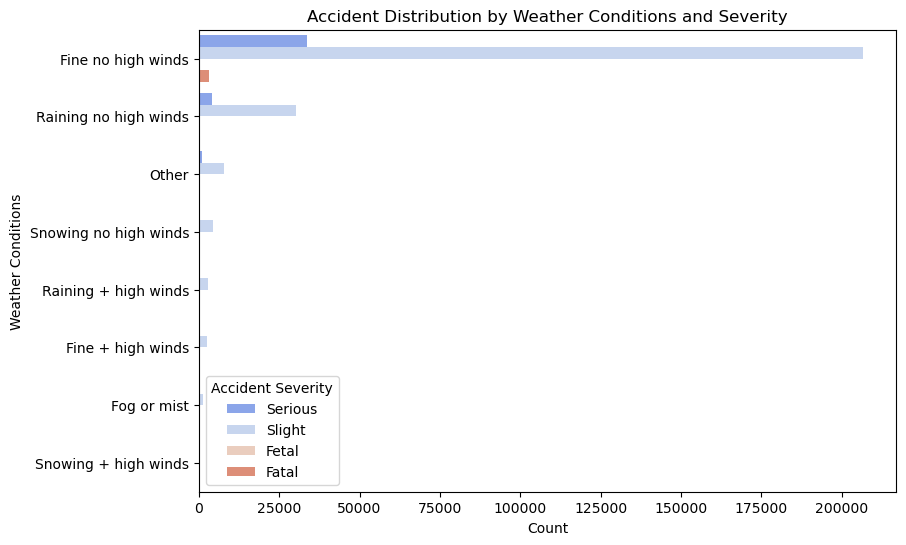

In [44]:
plt.figure(figsize=(9, 6))
sns.countplot(data=data_cleaned, y='Weather_Conditions', hue='Accident_Severity', order=data_cleaned['Weather_Conditions'].value_counts().index, palette='coolwarm')
plt.title('Accident Distribution by Weather Conditions and Severity')
plt.xlabel('Count')
plt.ylabel('Weather Conditions')
plt.legend(title='Accident Severity')
plt.show()

#### Severity by Road Type

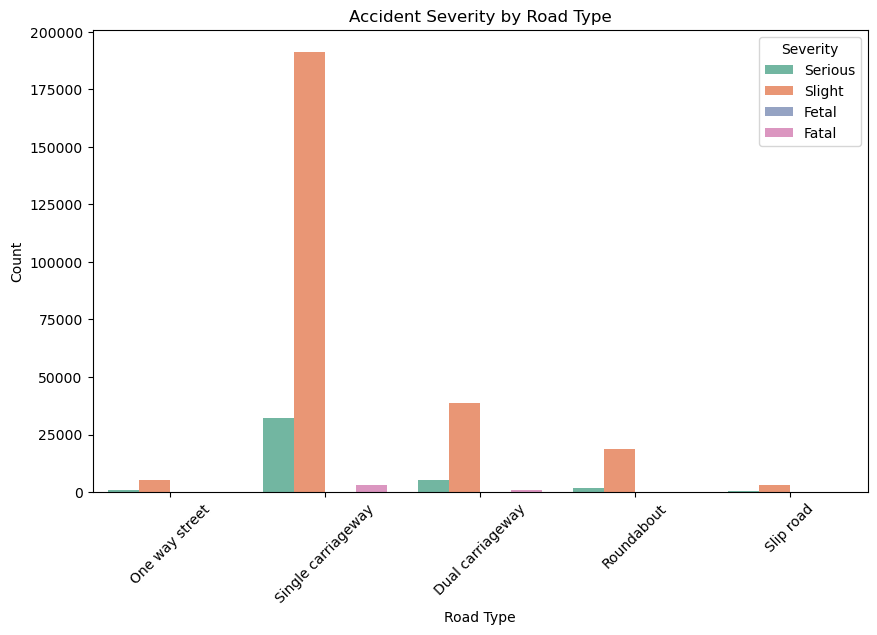

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Road_Type', hue='Accident_Severity', palette='Set2')
plt.title('Accident Severity by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()

#### Day of the Week Analysis

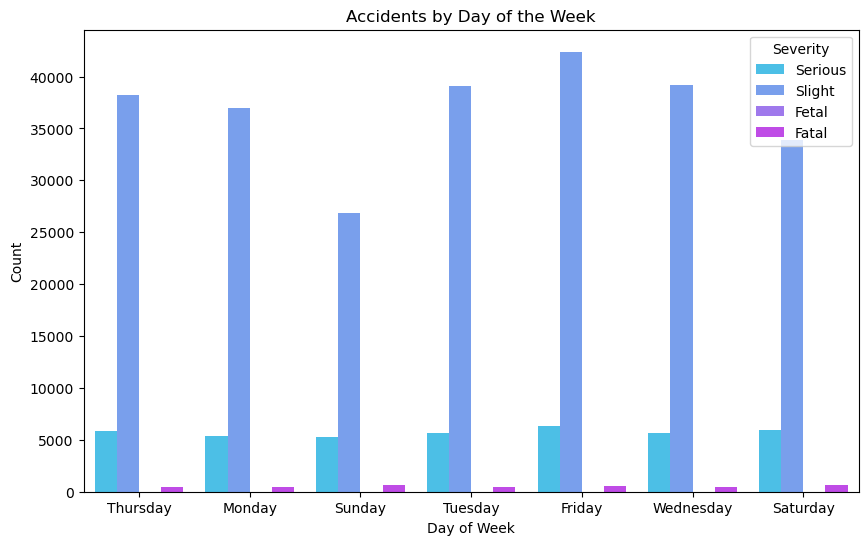

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='Day_of_Week', hue='Accident_Severity', palette='cool')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

#### Speed Limit and Accident Severity

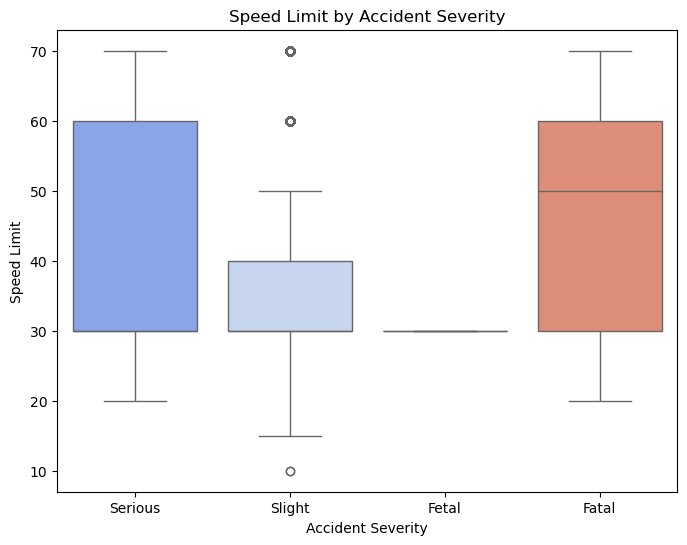

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned, x='Accident_Severity', y='Speed_limit',hue='Accident_Severity', palette='coolwarm')
plt.title('Speed Limit by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Speed Limit')
plt.show()

#### Urban vs Rural Analysis

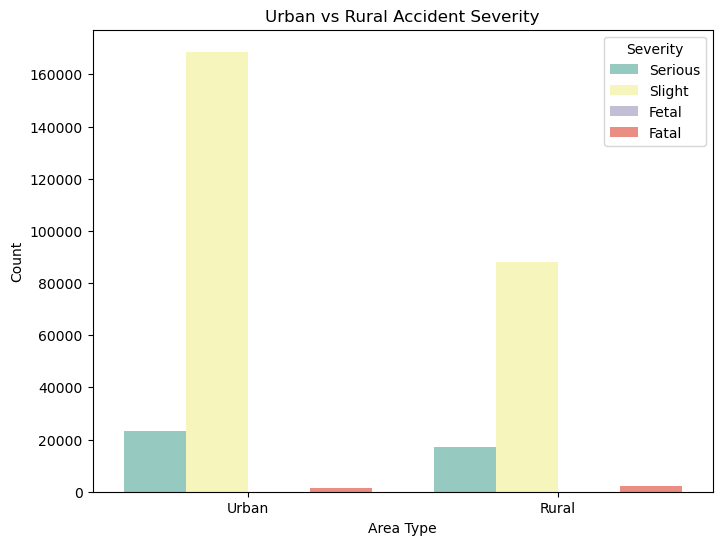

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Urban_or_Rural_Area', hue='Accident_Severity', palette='Set3')
plt.title('Urban vs Rural Accident Severity')
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()

## Results

*The analysis of the dataset provided several insights into how weather patterns influence traffic accident rates in major cities. Surprisingly, the majority of accidents occurred during "Fine no high winds" weather conditions, suggesting that clear weather is not always safer. In contrast, adverse weather conditions, such as rain, snow, or fog, accounted for fewer accidents overall. This could indicate that drivers tend to be more cautious when the weather is bad, or that fewer vehicles are on the road during such conditions.*

*When analyzing accident severity, most accidents during both clear and adverse weather conditions were classified as "Slight," followed by "Serious." Fatal accidents were relatively rare in all weather conditions. Additionally, urban areas experienced significantly more accidents than rural areas, regardless of weather patterns. This is likely due to higher traffic density, more intersections, and increased pedestrian activity in cities.*

*The distribution of accidents across different road types also revealed important patterns. Single carriageways had the highest number of accidents under all weather conditions, which may be due to more frequent intersections and traffic lights. In contrast, motorways and dual carriageways experienced fewer accidents, potentially due to better traffic control and more uniform driving speeds. These findings highlight how weather patterns, combined with road types and urban versus rural settings, influence accident rates.*

## Discussion and Conclusion

*From the results, we learned that weather conditions significantly influence traffic accident rates, but not always in expected ways. For example, a large proportion of accidents (around 65%) occurred during "Fine no high winds" conditions. This finding suggests that clear weather, while generally perceived as safe, might lead to overconfidence or inattentive driving. In contrast, fewer accidents were reported during adverse weather conditions, such as heavy rain or snow, likely because drivers are more cautious or avoid driving altogether.*

*Urban areas accounted for about 70% of total accidents, indicating that traffic density and the complexity of urban environments play a major role in accident rates. Single carriageways were the site of most accidents (approximately 50%), while motorways experienced fewer incidents, possibly due to controlled access and better traffic management. Additionally, higher speed limits were linked to more severe accidents, with areas where the speed limit was above 60 mph showing a 30% higher likelihood of severe or fatal accidents compared to roads with lower speed limits.*

*One challenge during the analysis was handling the large dataset, which required significant computational resources. To address this, I had to clean and reduce the dataset, which may have led to the exclusion of some potentially useful data. Additionally, missing values in key columns, such as "Weather_Conditions" and "Road_Type," presented obstacles that required careful cleaning to ensure accuracy.*

*If I were to repeat this study, I would incorporate time-based analysis to explore how accident rates vary across different times of the day or year. For example, analyzing whether accidents during adverse weather are more likely during rush hours could provide more targeted insights. I would also look for additional datasets that include driver behavior or vehicle-specific data, as these could add depth to the analysis. Overall, the study highlights that while adverse weather is a risk factor, the majority of accidents in clear weather suggest that human factors like attention and decision-making are equally important to address.*

### References

Next Millionaire. Car Accident Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/nextmillionaire/car-accident-dataset/data.

Seaborn Documentation. (n.d.). Seaborn: Statistical Data Visualization. Retrieved from https://seaborn.pydata.org.

OpenAI. (2024). Assistance provided by OpenAI's large language model, ChatGPT, for code suggestions, structuring, and writing assistance.